In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import DenseNet201

from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers, Sequential
from keras.layers.normalization import BatchNormalization
from keras.models import Model

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
batch_size = 64

In [18]:
# rescale normalizes the data for the images.
# Data is split into train and validation sets
image_data_gen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    validation_split=0.2)

train_it = image_data_gen.flow_from_directory(directory='/content/drive/MyDrive/TB_Chest_Radiography_Database',
                                              target_size=(224, 224),
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              subset='training'
                                             )

val_it = image_data_gen.flow_from_directory(directory='/content/drive/MyDrive/TB_Chest_Radiography_Database',
                                              target_size=(224, 224),
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              subset='validation'
                                             )

Found 5440 images belonging to 2 classes.
Found 1360 images belonging to 2 classes.


In [19]:
InceptionV3_model = tf.keras.applications.InceptionV3(
    include_top=False,
    input_tensor=None,
    input_shape=(224,224,3),
    weights = 'imagenet'
)

InceptionV3_model.trainable= False

global_avg_layer = tf.keras.layers.GlobalAveragePooling2D()
predictions = Dense(2, activation='softmax')

model = Sequential([
    InceptionV3_model,
    global_avg_layer,
    
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    predictions
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
batch_normalization_286 (Bat (None, 2048)              8192      
_________________________________________________________________
dropout_4 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_8 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_287 (Bat (None, 512)              

In [20]:
epochs = 10
model_hist = model.fit(train_it,
                       validation_data=val_it,
                       epochs=epochs, )
model.save('/content/drive/MyDrive/InceptionV3.h5')

Epoch 1/10
85/85 [==============================] - 640s 8s/step - loss: 0.6009 - accuracy: 0.8083 - val_loss: 0.5481 - val_accuracy: 0.7493
Epoch 2/10
85/85 [==============================] - 147s 2s/step - loss: 0.2803 - accuracy: 0.8980 - val_loss: 0.3528 - val_accuracy: 0.8434
Epoch 3/10
85/85 [==============================] - 148s 2s/step - loss: 0.2270 - accuracy: 0.9111 - val_loss: 0.2057 - val_accuracy: 0.9228
Epoch 4/10
85/85 [==============================] - 146s 2s/step - loss: 0.1917 - accuracy: 0.9273 - val_loss: 0.1920 - val_accuracy: 0.9235
Epoch 5/10
85/85 [==============================] - 146s 2s/step - loss: 0.1681 - accuracy: 0.9301 - val_loss: 0.1758 - val_accuracy: 0.9272
Epoch 6/10
85/85 [==============================] - 146s 2s/step - loss: 0.1779 - accuracy: 0.9295 - val_loss: 0.1730 - val_accuracy: 0.9287
Epoch 7/10
85/85 [==============================] - 145s 2s/step - loss: 0.1478 - accuracy: 0.9359 - val_loss: 0.1440 - val_accuracy: 0.9434
Epoch 8/10
85

In [21]:
results = model.evaluate(val_it)

22/22 [==============================] - 29s 1s/step - loss: 0.1384 - accuracy: 0.9419


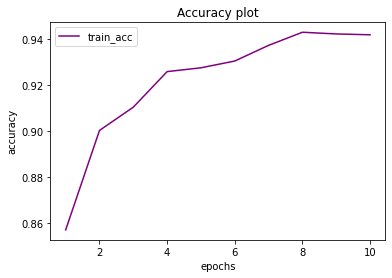

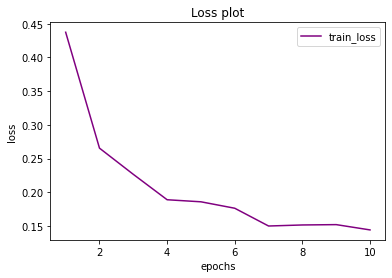

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
%matplotlib inline

epochs= range(1, len(model_hist.history["accuracy"])+1)

plt.plot(epochs, model_hist.history["accuracy"], color="purple")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc", "val_acc"])
plt.show()

plt.plot(epochs, model_hist.history["loss"], color="purple")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss", "val_loss"])
plt.show()